### Imports

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer, normalize
from sklearn.pipeline import make_pipeline
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
plt.style.use('ggplot')

# Clusternig

- Supervised learning finds patterns for a prediction task <br>
- Unsupervised learning finds patterns in data but without a specific prediction task in mind <br> <br>
- Dimension of the dataset = number of features

### k-means clustering
Working very similar to k-neighbors. New samples can be assigned to existing clusters. K-means remember the mean of each cluster (the "centroids") and it finds the nearest centroid to each new sample.

In [ ]:
model = KMeans(n_clusters=3)
model.fit(points)
labels = model.predict(new_points)
print(labels)

In [ ]:
xs = new_points[:,0]
ys = new_points[:,1]
plt.scatter(xs, ys, c=labels, alpha=0.5)
# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

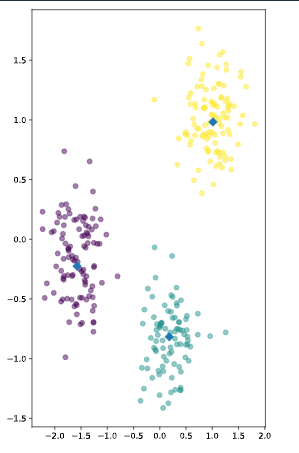

### Evaluating a clustering
- `Cross-tabulation` - we get great insights into which sort of samples are in which cluster. <br> <br>
 But what should we do if there are no labels assigned to data? How to measure clustering quality? We know that a good clustering has tight clusters and samples in each clusters bunched together. <br> <br>

- `Inertia` - measures how spread out the cluster are (lower is better) or how far are they from centroids <br>

Good habit is to choose an "elbow" in the interia plot to not overfit your model.

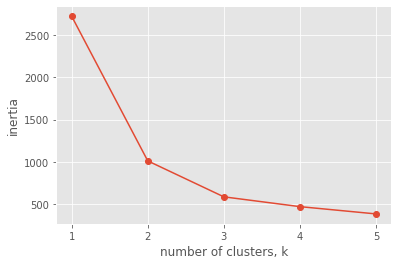

In [21]:
samples = pd.read_csv("Grains/seeds.csv", header=None)
# samples.drop(samples.columns[[-1,]], axis=1, inplace=True) # last column is labels
samples = samples.iloc[:,:-1]

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
#sns.scatterplot(x=ks, y=inertias)
#sns.lineplot(x=ks,y=inertias)
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# The inertia decreases very slowly from 3 clusters to 4, so it looks like 
# 3 clusters would be a good choice for this data.

In [22]:
# varieties
varieties = ["Kama wheat"]*70 + ["Rosa wheat"]*70 + ["Canadian wheat"]*70

model = KMeans(n_clusters=3)
labels = model.fit_predict(samples) # is the same as using .fit() and .predict()
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct) # nice
samples

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0


,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


### Transforming features for better clusterings
`StandardScaler` mostly used, other examples are: `MaxAbsScaler` and `Normalizer`

In [29]:
wines = pd.read_csv("wine.csv")
varieties = wines.class_name
#wines.drop(["class_name", "class_label"], axis=1, inplace=True)
wines = wines.iloc[:,2:]
model = KMeans(n_clusters=3)
labels = model.fit_predict(wines)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct) # this time is not the best... what is the problem ->

varieties  Barbera  Barolo  Grignolino
labels                                
0               29      13          20
1                0      46           1
2               19       0          50


The problem is that the features have very different variances, the variance of a feature measure the spread of its values. In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm, we have some features with enormous values in wine datasets - that is causing issues. <br> <br>

The data needs to be change in that way, that every feature would have the same variance. In order to achieve that we will be using a `StandardScaler` which transforms each feature to have mean equal 0 and variance 1 - normal distribution.

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(wines)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#samples_scaled = scaler.transform(wines)

In [30]:
# we can do both steps in pipeline!

# The only difference between pipeline and make_pipeline is that the second one
# generates names for steps automatically.

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(wines)
labels = pipeline.predict(wines)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct) # this is muuuuuch better

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0       0          65
2                0      59           3


In [40]:
fish = pd.read_csv("fish.csv")
fish.columns = ['species'] +['']*6
species = fish.species
#fish.drop('species', axis=1, inplace=True)
fish = fish.iloc[:,1:]

scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(fish)
labels = pipeline.predict(fish)

df = pd.DataFrame({"labels": labels, "species": species})
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     19      1
1           33     0      1      0
2            0     0      0     13
3            0    17      0      0


#### Normalizer vs StandardScaler:

The main difference is that Standard Scalar is applied on Columns, while Normalizer is applied on rows, So make sure you reshape your data before normalizing it.

In [44]:
stock_movements = pd.read_csv("company_stock_price_mov.csv")
# stock.rename(columns = {'Unnamed: 0':'company'}) # ????
companies = stock_movements['Unnamed: 0']
#stock_movements.drop('Unnamed: 0', axis=1, inplace=True)
stock_movements = stock_movements.iloc[:,1:]

normalizer = Normalizer()
kmeans = KMeans(n_clusters=10)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(stock_movements)
labels = pipeline.predict(stock_movements)
df = pd.DataFrame({'labels': labels, 'companies': companies})
df.sort_values('labels')

,labels,companies
44,0,Schlumberger
57,0,Exxon
53,0,Valero Energy
41,0,Philip Morris
12,0,Chevron
28,0,Coca Cola
10,0,ConocoPhillips
18,1,Goldman Sachs
26,1,JPMorgan Chase
5,1,Bank of America


# Visualizing hierarchies

### Hierarchical clustering
Arranges sample into a hierarchy of clusters. The entire process is encoded in dendogram.

#### Agglomerative clustering
In beginning every sample is its own cluster and at each steps two closest clusters are merged and eventually there is only one cluster.

#### Divisive clustering
Works the other way around.

In [126]:
'''eurovision = pd.read_csv('eurovision_2016.csv')
samples = eurovision
country_names = samples['From country'].unique()
# samples - array of scores
samples = samples.iloc[:,2:-2]
samples
#linkage performs hierarchical clustering
mergings = linkage(samples, method='complete')
dendrogram(mergings,
         labels=country_names,
         leaf_rotation=90,
         leaf_font_size=6)
plt.show()'''
eurovision = pd.read_csv('eurovision_2016.csv')
samples = eurovision
#samples.values
country_names = samples['From country'].unique()
# l = len(samples['From country'].unique())
# po 26 glosow?
#samples[samples['Jury Rank']==26]

#samples[samples['To country']=='Australia']


#samples['Avg Rank'] = (samples['Jury Rank'] + samples['Televote Rank'])/2
#samples[samples['To country']=='Armenia']


,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points,Avg Rank
25,Albania,Armenia,12,24,14,3,25,15,9,NaN,2.0,12.0
75,Australia,Armenia,12,22,12,10,19,13,12,NaN,NaN,12.5
100,Austria,Armenia,4,4,18,15,12,9,12,2.0,NaN,10.5
125,Azerbaijan,Armenia,25,25,25,25,25,25,25,NaN,NaN,25.0
151,Belarus,Armenia,5,14,16,10,5,8,4,3.0,7.0,6.0
176,Belgium,Armenia,23,23,23,18,23,25,4,NaN,7.0,14.5
202,Bosnia & Herzegovina,Armenia,5,10,20,20,4,9,12,2.0,NaN,10.5
227,Bulgaria,Armenia,3,1,3,2,3,1,3,12.0,8.0,2.0
252,Croatia,Armenia,15,1,9,3,18,7,12,4.0,NaN,9.5
277,Cyprus,Armenia,4,2,11,8,2,3,3,8.0,8.0,3.0


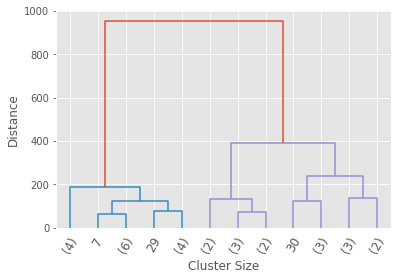

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [82]:
mtcars = pd.read_csv("mtcars.csv")
X = mtcars.iloc[:,[1,3,4,6]]
y = mtcars.iloc[:,[9]]
Z = linkage(X, 'ward')
dendrogram(Z, truncate_mode='lastp',p=12, leaf_rotation=60)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()
mtcars.head()

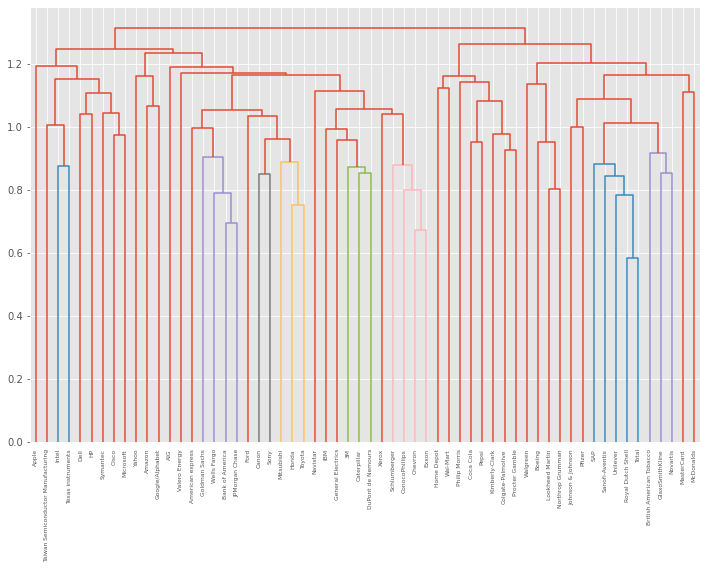

In [88]:
movements = stock_movements.values
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

normalized_movements = normalize(movements)
mergings = linkage(normalized_movements ,method='complete')
plt.figure(figsize=(12,8))
dendrogram(mergings, labels=companies, leaf_rotation=90, 
           leaf_font_size=6)
plt.show()


The y-axis of the dendrogram encodes the distance between merging clusters.

Distance between clusters defined by linkage method - "complete" method is the furthest distance between clusters samples while "single" is the closest. Scipy cluster start at 1 not at 0! 
#### Extracting cluster labels

In [ ]:
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,labels=country_names,leaf_rotation=90,leaf_font_size=6)
plt.show()